In [103]:
import os, json, gzip 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns

import string
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet, stopwords
import wordcloud
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Other imports
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt

[nltk_data] Downloading package omw-1.4 to /Users/yokk/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/yokk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/yokk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/yokk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /Users/yokk/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yokk/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [104]:
df = pd.read_csv('/Users/yokk/Desktop/ARP-Grecale/PistonHeads/PistonHeads.csv')

In [105]:
stopwords_list = stopwords.words('english')

In [106]:
def ReviewProcessing(df):
  # remove non alphanumeric 
  df['Comment_cleaned'] = df.Comment.str.replace('[^a-zA-Z0-9 ]', '')
  # lowercase
  df.Comment_cleaned = df.Comment_cleaned.str.lower()
  # split into list
  df.Comment_cleaned = df.Comment_cleaned.str.split(' ')
  # remove stopwords
  df.Comment_cleaned = df.Comment_cleaned.apply(lambda x: [item for item in x if item not in stopwords_list])
  return df

In [107]:
clean_data = ReviewProcessing(df)
clean_data.Comment = clean_data.Comment_cleaned.apply(' '.join)

/var/folders/_5/xgykdqgs55749jx1z7t6gbjh0000gn/T/ipykernel_8037/24093192.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.



In [108]:
clean_data

,Name,Comment,Date,Comment_cleaned
0,Oliie,looks much like puma,"May 10, 2023","[looks, much, like, puma, ]"
1,Rough101,front photographs reality looks nothing like o...,"May 10, 2023","[front, photographs, reality, looks, nothing, ..."
2,benjidog,another generic blob,"May 10, 2023","[another, generic, blob, ]"
3,TheMilkyBarKid,nice enough expensive next rivals first though...,"May 10, 2023","[nice, enough, expensive, next, rivals, first,..."
4,moggy1000,rear end fiat tiponot ugly car plain different...,"May 10, 2023","[rear, end, fiat, tiponot, ugly, car, plain, d..."
...,...,...,...,...
362,urquattroGus,swoll saidso based poster question including d...,"March 28, 2022","[swoll, saidso, based, poster, question, inclu..."
363,1974foggy,hyundai kia make better looking suvs,"March 30, 2022","[hyundai, kia, make, better, looking, suvs]"
364,ettore,issue exceptionally dull looking could release...,"March 30, 2022","[issue, exceptionally, dull, looking, could, r..."
365,CDP,truethe car isnt ugly means completely forgett...,"March 31, 2022","[truethe, car, isnt, ugly, means, completely, ..."


EDA and Wordcloud (word distribution)

In [109]:
all_words = df['Comment'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
    )]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the training dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [110]:
# Create stopword list

diff_stopwords = set(wordcloud.STOPWORDS) ^ set(nltk.corpus.stopwords.words("english"))
print(len(diff_stopwords))

stopwords = set(wordcloud.STOPWORDS) | set(nltk.corpus.stopwords.words("english"))
stopwords.update(["br", "href"])

print(len(stopwords))

83
229


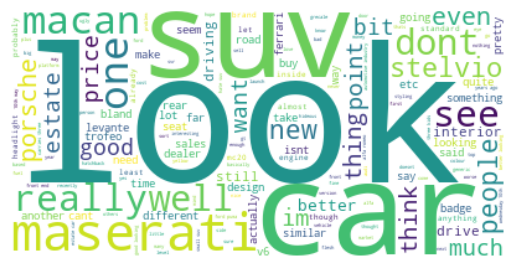

In [111]:
execellent_df = clean_data

pos_wordcloud = WordCloud(
    stopwords=stopwords,
    background_color="white",
).generate(" ".join(execellent_df.Comment.dropna()))

plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

NLP

In [112]:
#Tokenization
first_text = df.Comment.values[0]
print(first_text)
print("="*90)
print(first_text.split(" "))

looks much like puma 
['looks', 'much', 'like', 'puma', '']


In [113]:
first_text_list = nltk.word_tokenize(first_text)
print(first_text_list)

['looks', 'much', 'like', 'puma']


In [114]:
stopwords = nltk.corpus.stopwords.words('english')
len(stopwords)

179

In [115]:
stemmer = nltk.stem.PorterStemmer()

In [116]:
#Lemmatization

In [117]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

topic modellin lda

In [118]:
# Define helper function to print top words
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [119]:
# Extending the CountVectorizer class with a lemmatizer
lemm = WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

In [120]:
# Storing the entire training text in a list
text = list(df.Comment.values)
# Calling our overwritten Count vectorizer
tf_vectorizer = LemmaCountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)

In [122]:
feature_names = tf_vectorizer.get_feature_names()
count_vec = np.asarray(tf.sum(axis=0)).ravel()
zipped = list(zip(feature_names, count_vec))
x, y = (list(x) for x in zip(*sorted(zipped, key=lambda x: x[1], reverse=True)))
# Now I want to extract out on the top 15 and bottom 15 words
Y = np.concatenate([y[0:15], y[-16:-1]])
X = np.concatenate([x[0:15], x[-16:-1]])

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[0:50],
            y = y[0:50],
            marker= dict(colorscale='Jet',
                         color = y[0:50]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[-100:],
            y = y[-100:],
            marker= dict(colorscale='Portland',
                         color = y[-100:]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Bottom 100 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [ ]:
# Latent Dirichlet Allocation¶

In [125]:
lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

In [126]:
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=11, random_state=0)

In [127]:
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:stelvio maseratiness saidisnt different topyep pizza base street manic grecale think sleeper toppingsgood italianalogy saidw0o0dy week ate wait 200 510 known weve ticked electricsoverhangspowerhow grockle colourits ring 300 boxesitalian time muchnongermanic predictability retuned macandepreciationph strange trofeo quick nettuno mattersoh engine

Topic #1:macan stelvioqf better car dynamically option compared residual considered big higher grecale position intrigued summer suspect far level spend seating driving weight probably sense high premium year question justify rover brand appealing extremely standard fun new garage discussedi taken economic

Topic #2:old closer saidso fantasy swoll poster assume loud fantasizes garage brash including charger amercian fair dodge disappointing question ultimately woman heavy inside based 100k proving worse comparing crap 120k rrp dbx comparison actually year new looking ive urus maserati puma

Topic #3:like look ma

In [128]:
first_topic = lda.components_[0]
second_topic = lda.components_[1]
third_topic = lda.components_[2]
fourth_topic = lda.components_[3]

In [129]:
first_topic.shape

(1295,)

Word Cloud visualizations of the topics

In [130]:
first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
third_topic_words = [tf_feature_names[i] for i in third_topic.argsort()[:-50 - 1 :-1]]
fourth_topic_words = [tf_feature_names[i] for i in fourth_topic.argsort()[:-50 - 1 :-1]]

wordcloud first toic

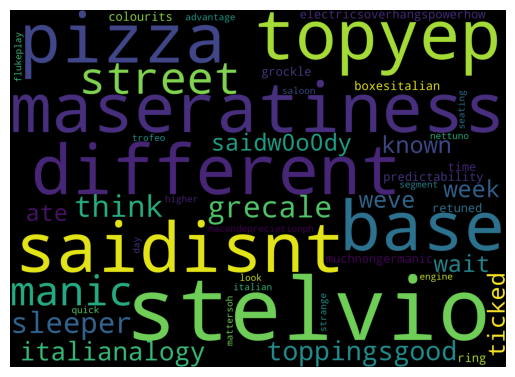

In [131]:
# Generating the wordcloud with the values under the category dataframe
firstcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

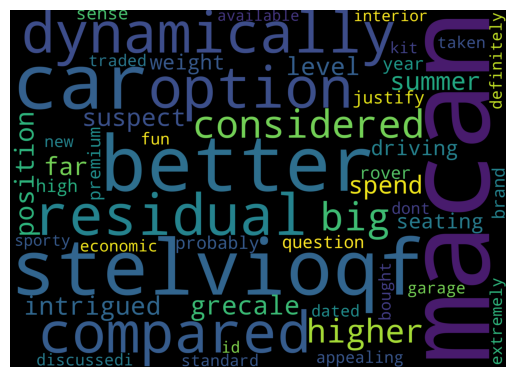

In [132]:
# Generating the wordcloud with the values under the category dataframe
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(second_topic_words))
plt.imshow(cloud)
plt.axis('off')
plt.show()